# Assignment Linear Regression and Normal Equation

#### Name: Pranisaa Charnparttaravanit, ID: st121720

This assignment illustrates how linear regression and normal equation analysis are performed on a data set called "CarPrice_Assignment". This data set includes 3 independent variable x-es (engine size, horse power and peak rmp) and a dependent y (price).

The followings will include brief explations of the steps of both analysis as well as an evaluation of the results.

### Import libraries

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Define functions
In this assignment, the required functions are as follows:
1. The function of hypothesis evaluation
2. The cost function
3. The gradient descent of cost function

#### Funtion 1: Evaluation of hypothesis

In [22]:
def h(X,theta):
    return X.dot(theta)

#### Function 2: Cost function

In [23]:
def cost(theta, X, y):
    return (h(X, theta) - y).T.dot(h(X, theta) - y)/2

#### Function 3: Gradient of cost function

In [24]:
def gradient(X, y, theta):
    grad = X.T.dot(h(X, theta) - y)
    return grad

def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad # going to the opposite direction --> double check
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

## Import file

In [25]:
raw_data = pd.read_csv("CarPrice_Assignment.csv", sep=',')
raw_data = raw_data.dropna()

In [26]:
raw_data.head()

,enginesize,horsepower,peakrpm,price
0,130,111,5000,13495.0
1,130,111,5000,16500.0
2,152,154,5000,16500.0
3,109,102,5500,13950.0
4,136,115,5500,17450.0


### Define independent x variables and dependent y

Retrieving data under columns called "enginesize", "horsepower" and "peakrpm" from the csv file and store them in ind_x.
The data under column called price are stored in def_y_orig 


In [27]:
cols = ['enginesize','horsepower','peakrpm']
ind_x = np.array(raw_data[cols],dtype = float)
dep_y_orig= np.array(raw_data['price'])
#print(ind_x)
#print(dep_y_orig)

## Model 1: Gradient descent

### Normalize x and y values

Since the data from the data set are not in the same scale, it is essential to normalize them before importing them into the linear regression model

In [28]:
x_mean=np.mean(ind_x, axis = 0)
x_sd=np.std(ind_x, axis = 0)
ind_x = (ind_x-x_mean)/x_sd
#print(ind_x)

y_mean = np.mean(dep_y_orig,axis =0)
y_std = np.std(dep_y_orig,axis = 0)
dep_y1 = (dep_y_orig-y_mean)/y_std
#print(dep_y1)

### Reshape dep_y and addition of dummy in X

In [29]:
y = np.array(dep_y1).reshape(-1,1)
#print(y)

X = ind_x[:,:]
X = np.insert(X,0,1,axis =1)
#print(X)

### Initialize thetas

Thetas are assumed to be equal to 0

In [30]:
theta_initial = np.zeros((X.shape[1],1))

#Check shapes
a = theta_initial.shape
b = X.shape
c = y.shape
print(b,c,a)

(205, 4) (205, 1) (4, 1)


### Find the actual thetas

In this case, alpha is taken as 0.00005 as an input to gredient_descent function with the iterations of 10000. These two values are assumed to be suitable to find the real theta for this data set. 

In [31]:
alpha = 0.00005
iterations = 10000

theta, costs, grad = gradient_descent(X,y,theta_initial,alpha,iterations)
print('Theta values ', theta) 

Theta values  [[9.30311383e-17]
 [6.91562226e-01]
 [2.41277910e-01]
 [5.23053184e-02]]


### Visualize the loss

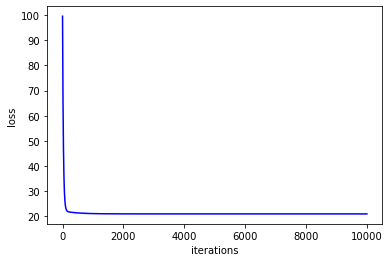

In [32]:
x_loss = np.arange(0,iterations,1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

### Goodness of fit

In [33]:
y_predicted =  h(X,theta)
r_square = 1 - np.square(dep_y1 - y_predicted.T).sum()/np.square(dep_y1 - y.mean()).sum()
print(r_square)

0.7950517888171817


### Compute mean and standard deviation of data

In [34]:
# Compute mean and standard deviation of data
sigma = np.array(np.std(dep_y_orig, axis=0))
mu = np.array(np.mean(dep_y_orig))
print("std",sigma)
print("mean",mu)

std 7969.34350572002
mean 13276.710570731706


### De-normalize y

In [35]:
y_predicted =  h(X, theta)* sigma + mu

print("The values of the predicted y are: ")
print(y_predicted[0:5,:])
print("The values of the actual y are: ")
print(dep_y_orig[0:5].reshape(-1,1))

The values of the predicted y are: 
[[13912.90873595]
 [13912.90873595]
 [18927.66048882]
 [11126.13899332]
 [15341.93255386]]
The values of the actual y are: 
[[13495.]
 [16500.]
 [16500.]
 [13950.]
 [17450.]]


## Model 2: Normal Equation

### Find Thetas

In [36]:
theta_normeqt = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(dep_y_orig.reshape(-1,1)) # normal equation
print(theta_normeqt)

[[13276.71057073]
 [ 5511.3184271 ]
 [ 1922.80565281]
 [  416.84803918]]


In [37]:
y_predicted_normeqt =  h(X, theta_normeqt)

print("The values of the predicted y from normal equation are: ")
print(y_predicted_normeqt[0:5,:])
print("The values of the actual y are: ")
print(dep_y_orig[0:5].reshape(-1,1))


The values of the predicted y from normal equation are: 
[[13912.90432724]
 [13912.90432724]
 [18927.64469094]
 [11126.13793288]
 [15341.93857703]]
The values of the actual y are: 
[[13495.]
 [16500.]
 [16500.]
 [13950.]
 [17450.]]


## Analysis and Evaluation

To evaluate the accuracy of the models, the percentage of deviation was calculated.

#### Devation of gradient descent model

In [38]:
diff = abs((y_predicted-dep_y_orig.reshape(-1, 1))/dep_y_orig.reshape(-1,1))
print(diff[:5].reshape(-1,1))


[[0.03096767]
 [0.15679341]
 [0.14713094]
 [0.20242731]
 [0.12080616]]


#### Devation of normal equation model

In [39]:
diff2 = abs((y_predicted_normeqt-dep_y_orig.reshape(-1, 1))/dep_y_orig.reshape(-1,1))
print(diff2[:5].reshape(-1, 1))


[[0.03096735]
 [0.15679368]
 [0.14712998]
 [0.20242739]
 [0.12080581]]


In [40]:
def acc(diff,c):
    filter_list = list(filter(lambda x:x<=c,diff))
    return len(filter_list)
print(acc(diff,0.3)/len(ind_x))
print(acc(diff2,0.3)/len(ind_x))


0.7804878048780488
0.7804878048780488


As shown above, both models have exactly the same accuracy. 